### Week 7

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
from matplotlib.colors import LogNorm 
from matplotlib import cm
from mdtraj import Trajectory

In [3]:
#Using mdtraj, in a jupyter notebook, 
#align your alphafold predictions to the crystal structure and make a bar plot showing the RMSD of each predicted structure to the crystal structure based on alpha-carbons and based on the full backbone and side-chains. 
#Does alphafold get everything right or just the backbone structure?

pdb = md.load("1LYS_1.pdb")
alphafold = md.load("1LYS/unrelaxed_model_1_pred_0.pdb")


alphafold_alpha_carbons = alphafold.atom_slice(alphafold.topology.select("name CA"))
alphafold_backbone = alphafold.atom_slice(alphafold.topology.select("backbone"))
alphafold_side_chains = alphafold.atom_slice(alphafold.topology.select("sidechain"))
#backbone_side_chains = alphafold.atom_slice(alphafold.topology.select("backbone and sidechain"))
print(type(alphafold_alpha_carbons))

pdb_alpha_carbons = pdb.atom_slice(pdb.topology.select("name CA"))
pdb_backbone = pdb.atom_slice(pdb.topology.select("backbone"))
pdb_side_chains = pdb.atom_slice(pdb.topology.select("sidechain"))

print(type(pdb_alpha_carbons))
                    
#aligned = md.Trajectory.superpose(reference = pdb, self = alphafold)
#rmsd = md.rmsd(target = alphafold, reference = pdb, precentered = True)


#alphafold aligned to pdb all
alphafold_aligned = alphafold.superpose(pdb, atom_indices = [0,998])

#alphafold alpha carbons aligned to pdb alpha carbons
aligned_to_alpha_ca_rmsd = md.rmsd(alphafold_alpha_carbons, reference=pdb_alpha_carbons)

#alphafold backbone aligned to pdb backbone
aligned_to_backbone_rmsd = md.rmsd(alphafold_backbone, reference=pdb_backbone)

#alphafold backbone aligned to sidechain
#aligned_to_sidechain_rmsd = md.rmsd(alphafold_side_chains, reference = pdb_side_chains)

print(type(alphafold_aligned))
print(type(aligned_to_backbone_rmsd))

<class 'mdtraj.core.trajectory.Trajectory'>
<class 'mdtraj.core.trajectory.Trajectory'>
<class 'mdtraj.core.trajectory.Trajectory'>
<class 'numpy.ndarray'>


[0.05451853]
[0.]


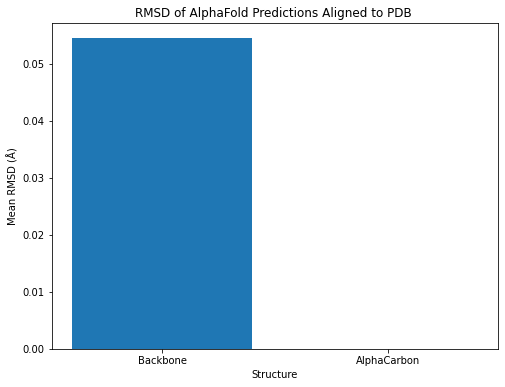

In [19]:
### ATTEMPT 2

#load files
pdb = md.load("1LYS_1.pdb")
#pdb = md.load("1LYS_2.pdb")
#pdb = md.load("1LYS.pdb")
alphafold = md.load("1LYS/unrelaxed_model_1_pred_0.pdb")

#align 
#alphafold.superpose(pdb, pdb)
#alphafold.superpose(pdb)
#rmsd_pdb = md.rmsd(pdb,pdb)
#print(rmsd_pdb)

# Calculate RMSD for alpha-carbons (backbone)
rmsd_backbone = md.rmsd(alphafold, pdb, atom_indices=alphafold.top.select_atom_indices("alpha"))
print(rmsd_backbone)

# Calculate RMSD for the full backbone and side-chains
all_atom_indices = list(range(len(alphafold.xyz)))
rmsd_full = md.rmsd(alphafold, pdb, atom_indices=all_atom_indices)
print(rmsd_full)

plt.figure(figsize=(8, 6))
plt.bar(["Backbone"], rmsd_backbone)
plt.bar(["AlphaCarbon"], rmsd_full)
#plt.bar(['Alpha Carbons', 'Backbone + Side-Chains'], [rmsd_backbone, rmsd_full])
plt.xlabel('Structure')
plt.ylabel('Mean RMSD (Å)')
plt.title('RMSD of AlphaFold Predictions Aligned to PDB ')
plt.show()




In [6]:
pdb = md.load("1LYS_1.pdb")
alphafold = md.load("1LYS/relaxed_model_1_pred_0.pdb")
#alphafold = md.load("1LYS/ranked_1.pdb")

#align 
alphafold.superpose(pdb, atom_indices = [0,998])

<mdtraj.Trajectory with 1 frames, 1960 atoms, 129 residues, without unitcells at 0x14e970e2ddc0>

In [ ]:
# From your alphafold greene output, make a picture of your protein colored by PLDDT score (stored in B-factor column), and put it in your figures folder. Which residues should we be confident in?

In [ ]:
#See figures folder for rendering
#Can be confident about helices